In [271]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns


In [235]:
#connection with database
df = pd.read_csv('dataset.csv')

# Analysis

In [236]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [237]:
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


In [238]:
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [239]:
df[df.duplicated]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [240]:
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

# Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?


In [246]:
df_filter = df[df['Categoria'] == 'Office Supplies']
df_filter


,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [250]:
df_total = df_filter.groupby('Cidade')['Valor_Venda'].sum()
df_total

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          1107.646
Albuquerque     943.122
Alexandria     4879.790
                 ...   
Woonsocket      142.590
Yonkers         665.964
York            395.920
Yucaipa          50.800
Yuma             55.352
Name: Valor_Venda, Length: 480, dtype: float64

In [253]:
max_value = df_total.idxmax()
print("The city with the biggest sales Value for 'Office Supplies' is:", max_value)

The city with the biggest sales Value for 'Office Supplies' is: New York City


# Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

In [160]:

summed_df = df.groupby('Data_Pedido')['Valor_Venda'].sum().reset_index()

In [161]:
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%d/%m/%Y')
df.set_index('Data_Pedido', inplace=True)

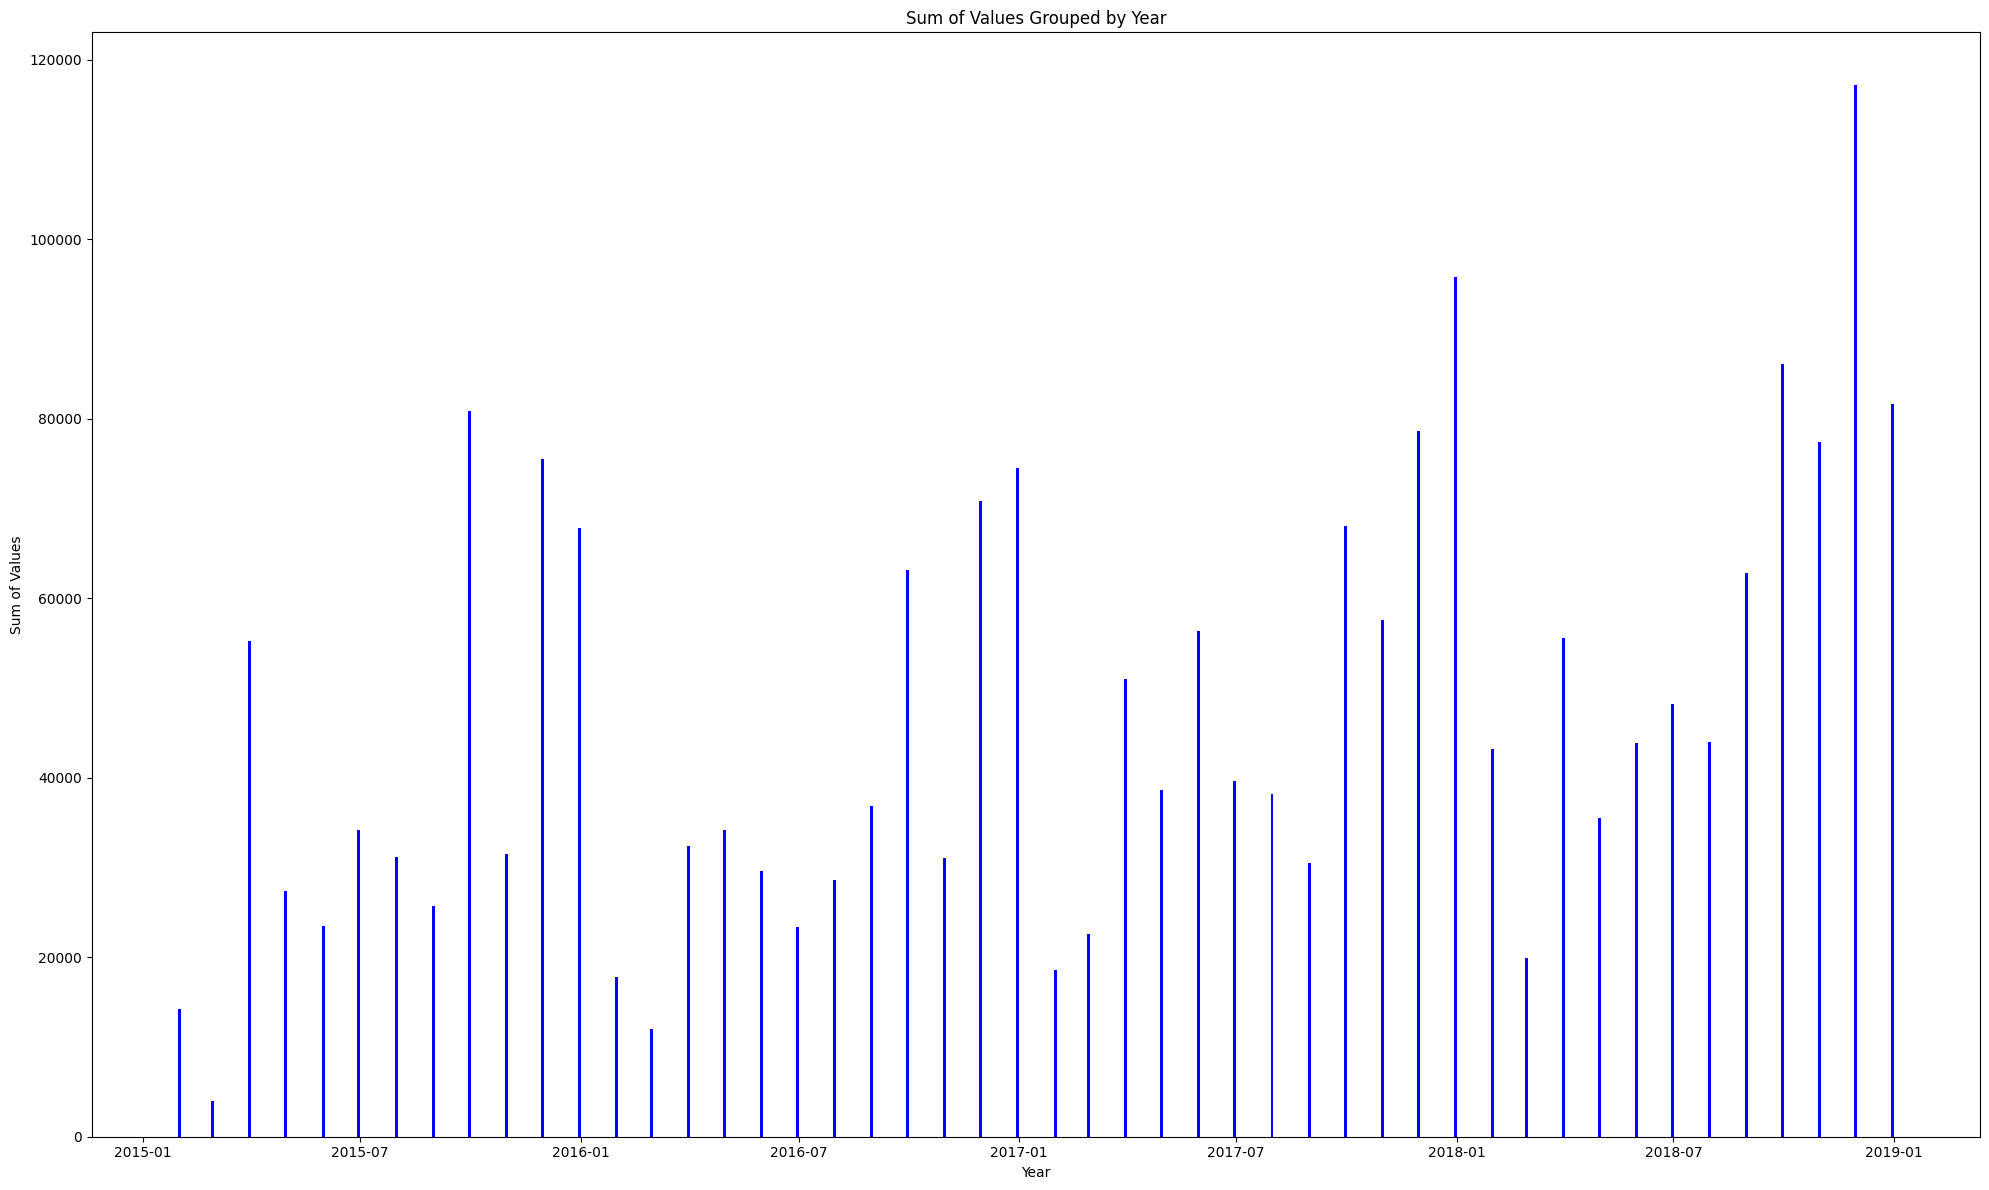

In [162]:
# Group by year and sum the values
df_grouped = df.groupby(pd.Grouper(freq='M')).sum()

# Plotting the data
plt.figure(figsize=(20, 12))
plt.bar(df_grouped.index, df_grouped['Valor_Venda'], color='blue', width=2.5)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.tight_layout()
plt.show()

# Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

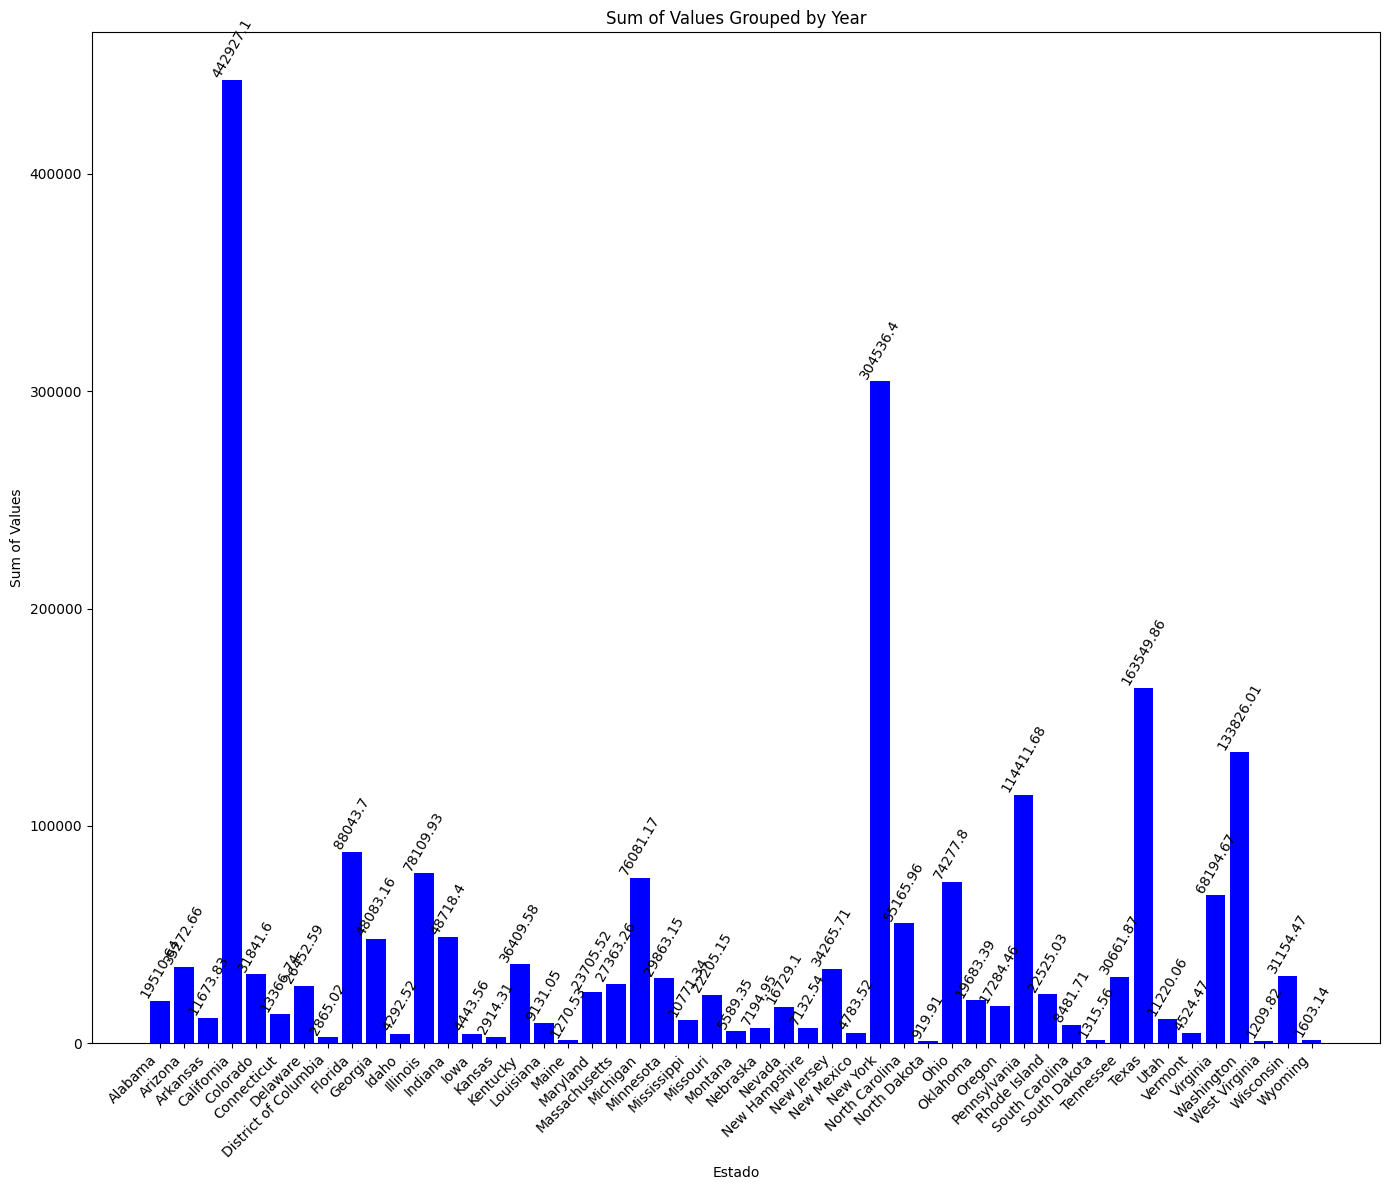

In [254]:
# Group by year and sum the values
df_grouped = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(14, 12))
bars = plt.bar(df_grouped['Estado'], df_grouped['Valor_Venda'], color='blue', width=0.8)

# Add labels and title
plt.xlabel('Estado')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', rotation=60)

plt.tight_layout()
plt.show()

# Pergunta de Negócio 4:
Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.

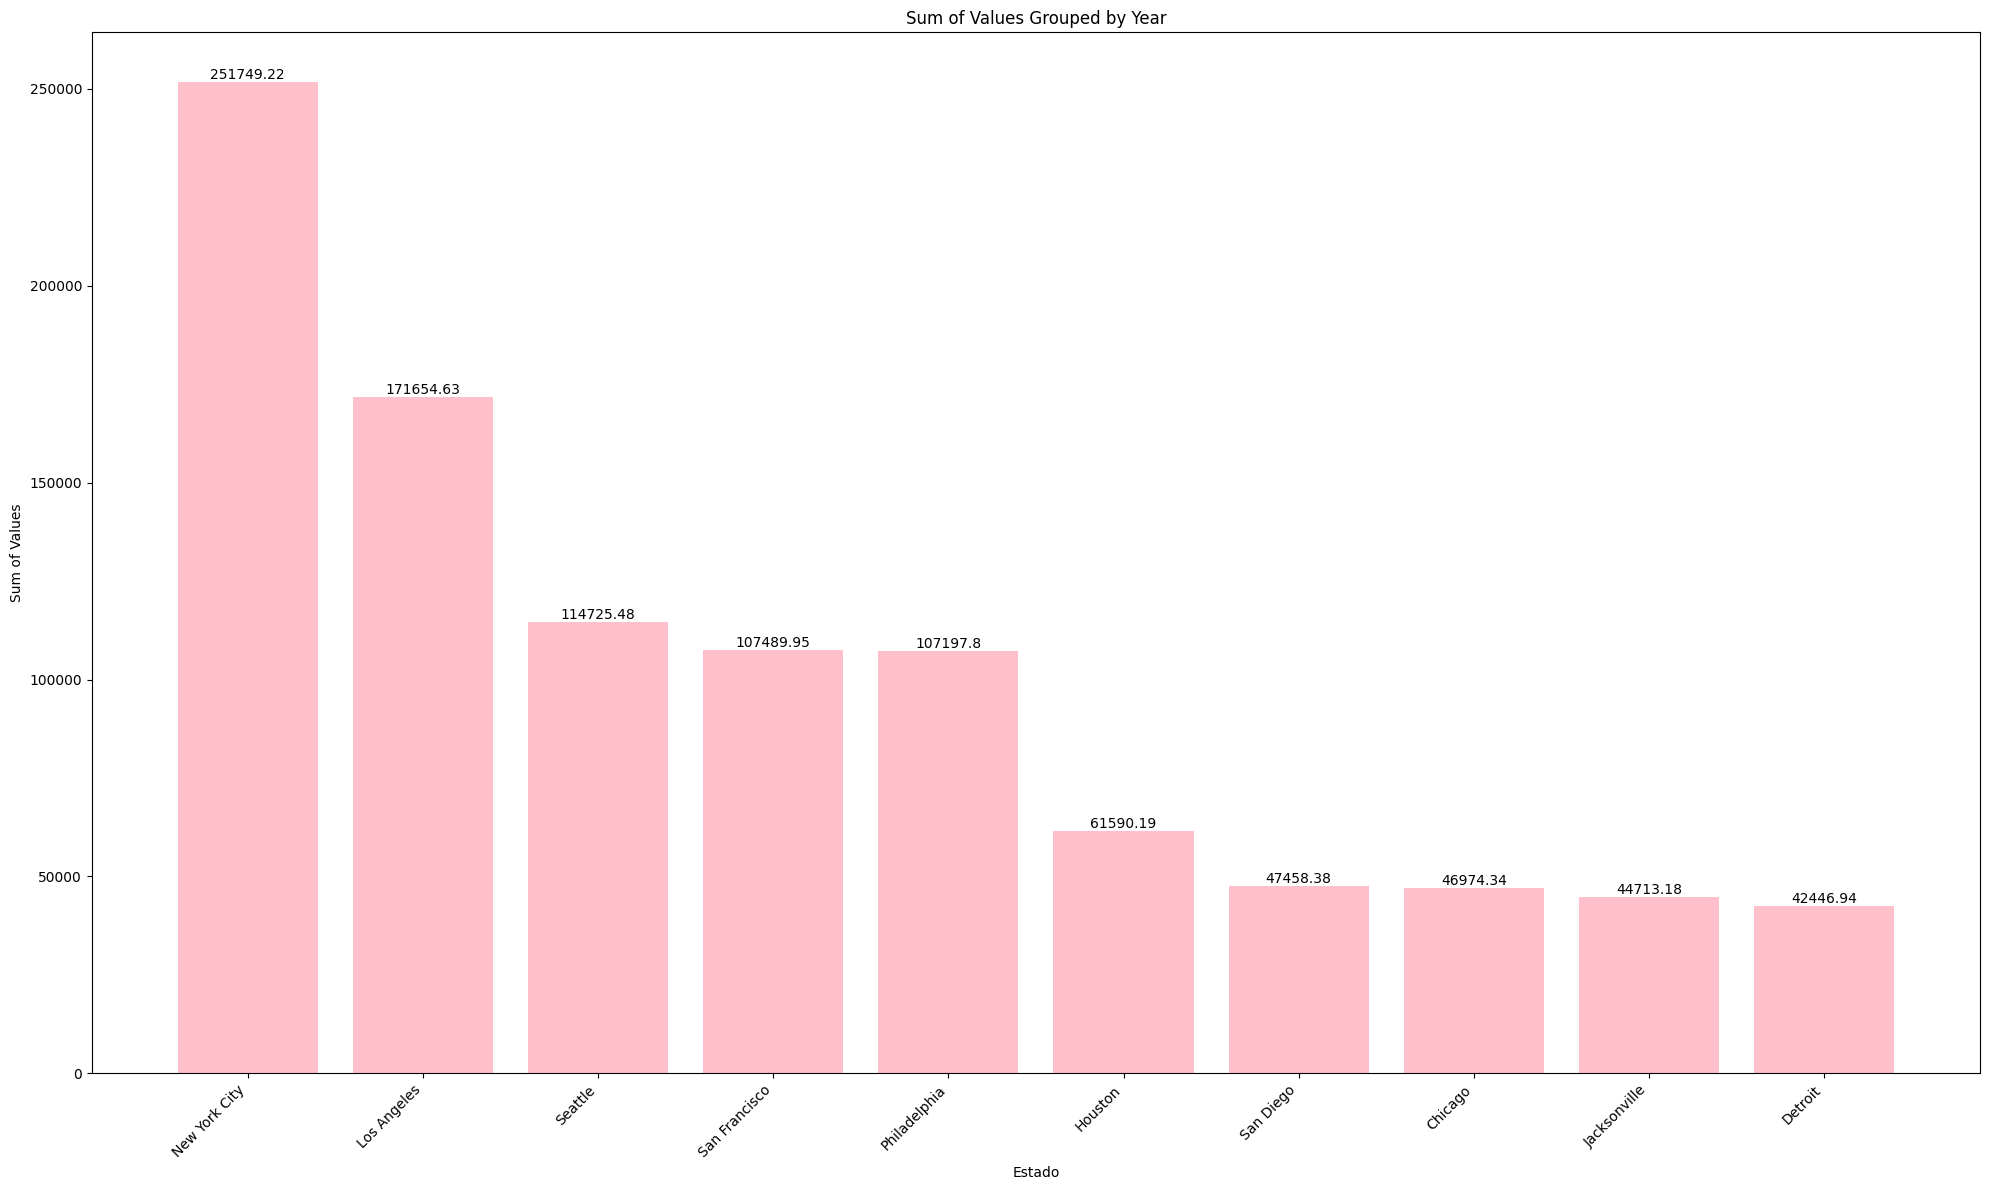

In [164]:
# Group by year and sum the values
df_grouped = df.groupby('Cidade')['Valor_Venda'].sum().reset_index()

# Sort the DataFrame by Sales in descending order
df_sorted = df_grouped.sort_values(by='Valor_Venda', ascending=False)

# Select the top 10 cities
top_10_cities = df_sorted.head(10)

# Plotting the data
plt.figure(figsize=(20, 12))
bars = plt.bar(top_10_cities['Cidade'], top_10_cities['Valor_Venda'], color='pink', width=0.8)

# Add labels and title
plt.xlabel('Estado')
plt.ylabel('Sum of Values')
plt.title('Sum of Values Grouped by Year')

plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Pergunta de Negócio 5:
Qual Segmento Teve o Maior Total de Vendas?
Demonstre o resultado através de um gráfico de pizza.

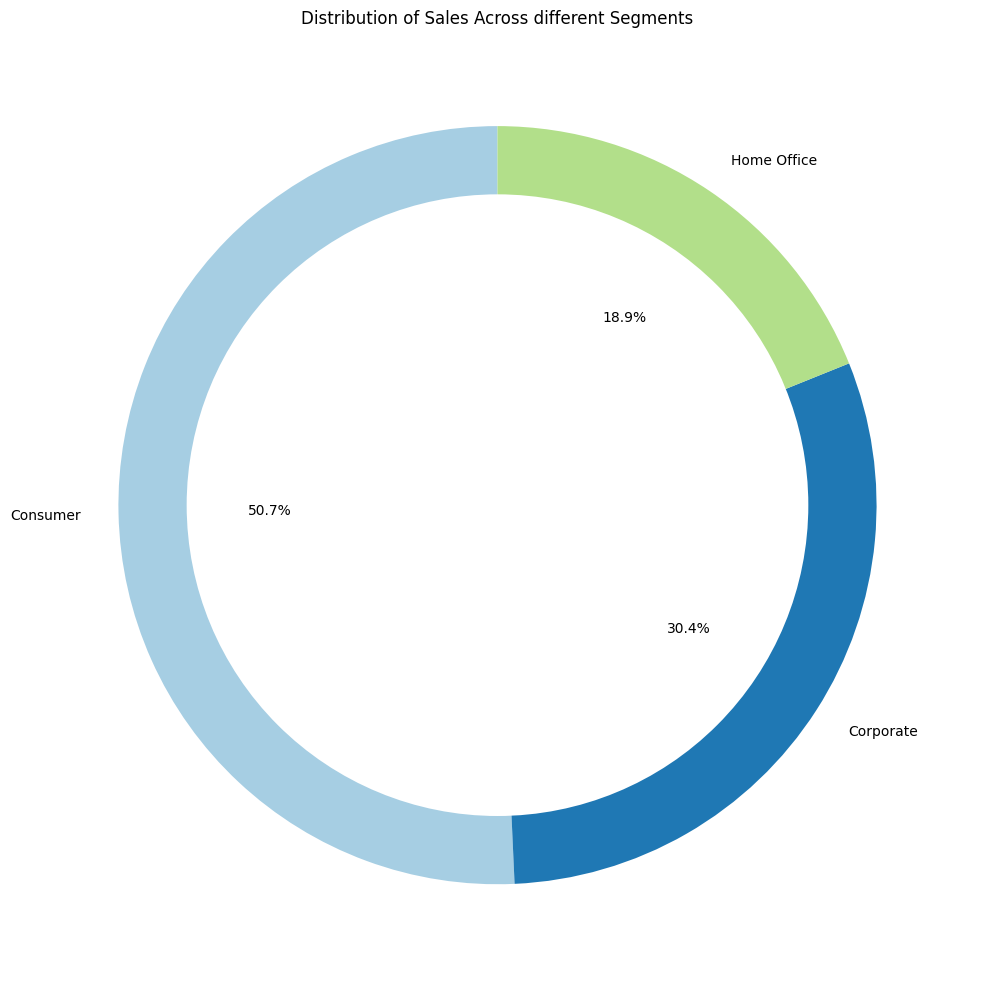

In [256]:
# Group by Segment and sum the values
df_grouped = df.groupby('Segmento')['Valor_Venda'].sum().reset_index()



# Plotting the data
plt.figure(figsize=(10, 10))
bars = plt.pie(df_grouped['Valor_Venda'], labels=df_grouped['Segmento'],  autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add labels and title
plt.title('Distribution of Sales Across different Segments')

centre_circle = plt.Circle((0,0), 0.82, fc= 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.tight_layout()
plt.show()

# Pergunta de Negócio 6 (Desafio Nível Baby):
Qual o Total de Vendas Por Segmento e Por Ano?


In [166]:
# Convert the index to DateTimeIndex
df.index = pd.to_datetime(df.index)

# Change the date format of the index to only the year
df_year = df
df_year.index = df_year.index.strftime('%Y')
df_year

,ID_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
Data_Pedido,,,,,,,,,,
2017,CA-2017-152156,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
2017,CA-2017-152156,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2017,CA-2017-138688,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
2016,US-2016-108966,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
2016,US-2016-108966,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760


In [167]:
df

,ID_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
Data_Pedido,,,,,,,,,,
2017,CA-2017-152156,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
2017,CA-2017-152156,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2017,CA-2017-138688,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
2016,US-2016-108966,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
2016,US-2016-108966,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680
...,...,...,...,...,...,...,...,...,...,...
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200
2018,CA-2018-154116,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760


In [168]:
# Group by the year in the DateTime index and calculate the mean
grouped_df = df_year.groupby([df_year.index, 'Segmento']).sum()
grouped_df

ID_Pedido  \
Data_Pedido Segmento                                                         
2015        Consumer     CA-2015-115812CA-2015-115812CA-2015-115812CA-2...   
            Corporate    CA-2015-106376CA-2015-106376US-2015-100853US-2...   
            Home Office  US-2015-152030CA-2015-110072CA-2015-158274CA-2...   
2016        Consumer     US-2016-108966US-2016-108966CA-2016-106320US-2...   
            Corporate    CA-2016-149734US-2016-136476CA-2016-124919CA-2...   
            Home Office  US-2016-118983US-2016-118983CA-2016-117415CA-2...   
2017        Consumer     CA-2017-152156CA-2017-152156CA-2017-161389CA-2...   
            Corporate    CA-2017-138688CA-2017-137330CA-2017-137330CA-2...   
            Home Office  CA-2017-159695CA-2017-158568CA-2017-158568CA-2...   
2018        Consumer     CA-2018-114412US-2018-156909CA-2018-114440CA-2...   
            Corporate    CA-2018-120999CA-2018-139619US-2018-118038US-2...   
            Home Office  CA-2018-107727US-2018-119662US-2018-109484CA-2...   

                                                                ID_Cliente  \
Data_Pedido Segmento                                                         
2015        Consumer     BH-11710BH-11710BH-11710BH-11710BH-11710BH-117...   
            Corporate    BS-11590BS-11590JB-15400JB-15400DK-13150DK-131...   
            Home Office  AD-10180MG-17680RM-19675RM-19675RM-19675FM-142...   
2016        Consumer     SO-20335SO-20335EB-13870TB-21520TB-21520TB-215...   
            Corporate    JC-16105GG-14650SP-20650SP-20650SP-20650MZ-175...   
            Home Office  HP-14815HP-14815SN-20710SN-20710SN-20710SN-207...   
2017        Consumer     CG-12520CG-12520IM-15070EH-13945EH-13945LH-169...   
            Corporate    DV-13045KB-16585KB-16585GH-14485GH-14485RA-198...   
            Home Office  GM-14455RB-19465RB-19465RB-19465LS-16975LS-169...   
2018        Consumer     AA-10480SF-20065TB-21520PO-18865PG-18895PG-188...   
            Corporate    LC-16930ES-14080KB-16600KB-16600KB-16600CV-128...   
            Home Office  MA-17560CS-12400RB-19705PN-18775VM-21685CS-124...   

                                                                      Pais  \
Data_Pedido Segmento                                                         
2015        Consumer     United StatesUnited StatesUnited StatesUnited ...   
            Corporate    United StatesUnited StatesUnited StatesUnited ...   
            Home Office  United StatesUnited StatesUnited StatesUnited ...   
2016        Consumer     United StatesUnited StatesUnited StatesUnited ...   
            Corporate    United StatesUnited StatesUnited StatesUnited ...   
            Home Office  United StatesUnited StatesUnited StatesUnited ...   
2017        Consumer     United StatesUnited StatesUnited StatesUnited ...   
            Corporate    United StatesUnited StatesUnited StatesUnited ...   
            Home Office  United StatesUnited StatesUnited StatesUnited ...   
2018        Consumer     United StatesUnited StatesUnited StatesUnited ...   
            Corporate    United StatesUnited StatesUnited StatesUnited ...   
            Home Office  United StatesUnited StatesUnited StatesUnited ...   

                                                                    Cidade  \
Data_Pedido Segmento                                                         
2015        Consumer     Los AngelesLos AngelesLos AngelesLos AngelesLo...   
            Corporate    GilbertGilbertChicagoChicagoDecaturDecaturChar...   
            Home Office  HoustonNewarkMonroeMonroeMonroeLos AngelesLake...   
2016        Consumer     Fort LauderdaleFort LauderdaleOremPhiladelphia...   
            Corporate    DurhamBristolSan JoseSan JoseSan JoseRedlandsD...   
            Home Office  Fort WorthFort WorthHoustonHoustonHoustonHoust...   
2017        Consumer     HendersonHendersonSeattleLos AngelesLos Angele...   
            Corporate    Los AngelesFremontFremontRichardsonRichardsonL...   
      

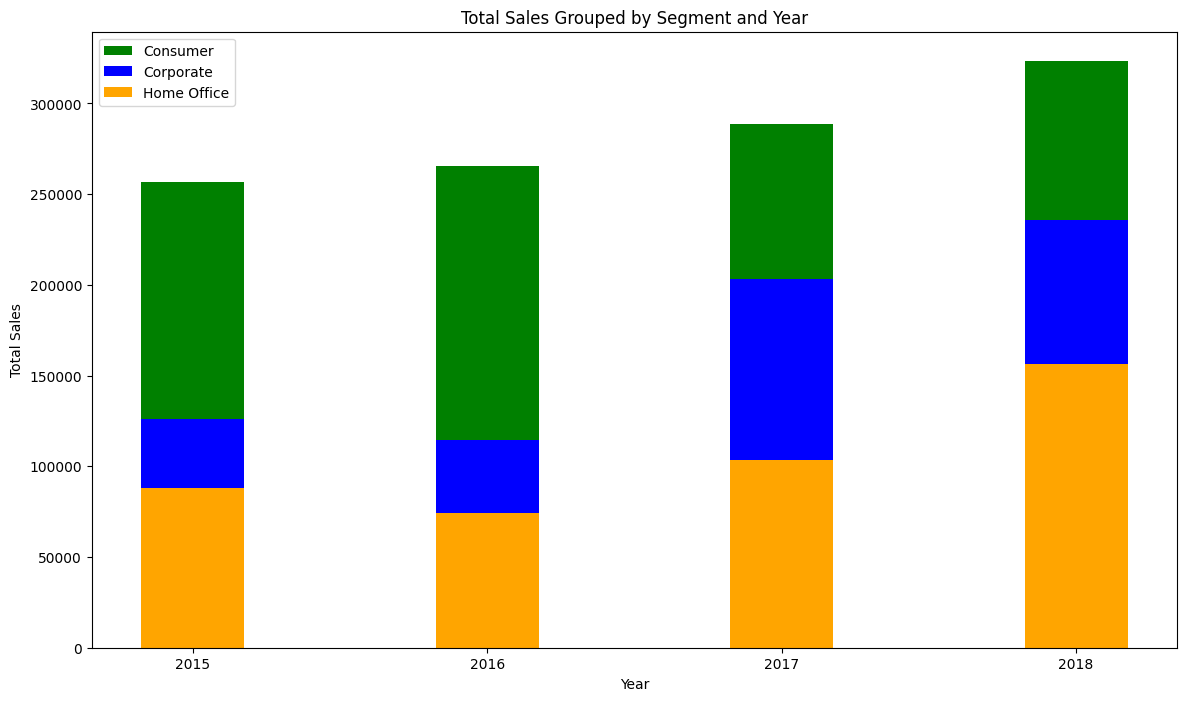

In [169]:

# Pivot the DataFrame to have 'Segment' as columns
df_pivot = grouped_df['Valor_Venda'].unstack().fillna(0)

# Plotting the data
plt.figure(figsize=(14, 8))

# Bar chart with multiple segments
bar_width = 0.35
bar_locations = df_pivot.index
bottom_values = None

for category, color in zip(df_pivot.columns, ['green', 'blue', 'orange']):
    plt.bar(bar_locations, df_pivot[category], bar_width, label=category, color=color)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Grouped by Segment and Year')
plt.legend()

plt.show()

# • Pergunta de Negócio 7 (Desafio Nível Júnior):
Os gestores da empresa estão considerando conceder diferentes faixas de descontos e
gostariam de fazer uma simulação com base na regra abaixo:
Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
Quantas Vendas Receberiam 15% de Desconto?


In [261]:
Discount_count = (df['Valor_Venda'] > 1000).sum()
df['Discount'] = np.where(df['Valor_Venda']>1000,0.15,0.10)
Discount_count 

457

# Pergunta de Negócio 8 (Desafio Nível Master):
Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [264]:
df['value_discount'] = df['Valor_Venda']-df['Valor_Venda']*df['Discount']

Discount_calculation = df['value_discount'].mean()
Discount_calculation 

202.43640212886598

In [267]:
df_beforediscount = df.loc[df['Discount'] == 0.15, 'Valor_Venda']
df_afterdiscount = df.loc[df['Discount'] == 0.15, 'value_discount']

In [268]:
mean_before = df_beforediscount.mean()
mean_after = df_afterdiscount.mean()

In [269]:
print("The mean before the discount is:", mean_before)

The mean before the discount is: 2116.8078153172864


In [270]:
print("The mean after the discount is:", mean_after)

The mean after the discount is: 1799.2866430196934


# Pergunta de Negócio 9 (Desafio Nível Master Ninja):
Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha

In [173]:
# Supondo que seu arquivo CSV tem colunas chamadas 'parametro1', 'parametro2' e 'parametro3'
df2 = pd.read_csv('dataset.csv')

# Convert the 'Date' column to datetime
df2['Data_Pedido'] = pd.to_datetime(df2['Data_Pedido'], format='%d/%m/%Y')

# Set the 'Date' column as the index
df2.set_index('Data_Pedido', inplace=True)

# Extract month and year information
df2['Month_Year'] = df2.index.strftime('%m/%Y')



In [174]:
# Change the date format of the index to only the year
df2_year = df2
df2_year.index = df2_year.index.strftime('%Y')




In [175]:
# Group by the year in the DateTime index and calculate the mean
grouped_df_year = df2_year.groupby([df2_year.index, 'Segmento'])['Valor_Venda'].mean().reset_index()


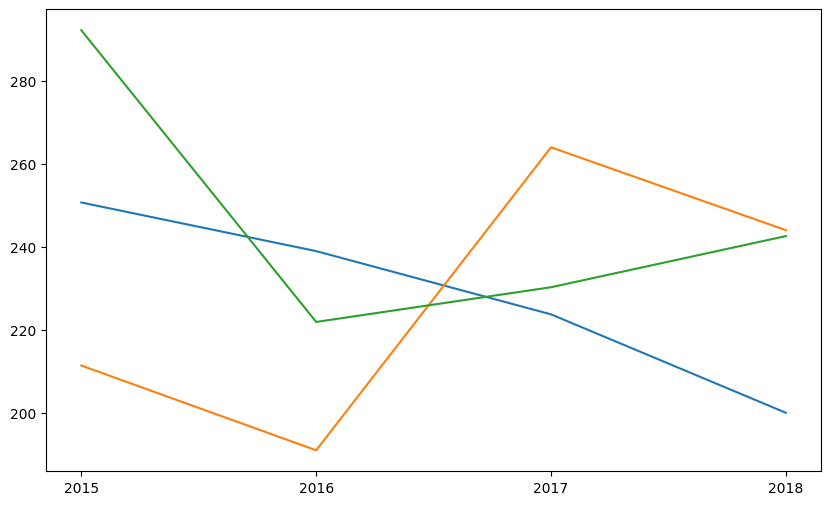

In [176]:
# Cria o gráfico de linhas
plt.figure(figsize=(10, 6))

for segmento, group in grouped_df_year.groupby('Segmento'):
    plt.plot(group['Data_Pedido'], group['Valor_Venda'], label=f'{segmento}')

In [177]:
# Supondo que seu arquivo CSV tem colunas chamadas 'parametro1', 'parametro2' e 'parametro3'
df3 = pd.read_csv('dataset.csv')

# Convert the 'Date' column to datetime
df3['Data_Pedido'] = pd.to_datetime(df3['Data_Pedido'], format='%d/%m/%Y')

# Extract month and year
df3['Month'] = df3['Data_Pedido'].dt.month
df3['Year'] = df3['Data_Pedido'].dt.year
df3

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Month,Year
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,11,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,11,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,6,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,10,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,12,2018
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,12,2018
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,12,2018
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,10,2017


In [285]:
# Group by the year in the DateTime index and calculate the mean
grouped_df3 = df3.groupby(['Month', 'Year', 'Segmento'])['Valor_Venda'].mean().reset_index()

grouped_df3

,Month,Year,Segmento,Valor_Venda
0,1,2015,Consumer,146.736787
1,1,2015,Corporate,130.886769
2,1,2015,Home Office,329.855882
3,1,2016,Consumer,570.999344
4,1,2016,Corporate,142.525238
...,...,...,...,...
139,12,2017,Corporate,284.965210
140,12,2017,Home Office,241.487957
141,12,2018,Consumer,183.616244
142,12,2018,Corporate,153.167403


<Figure size 1200x600 with 0 Axes>

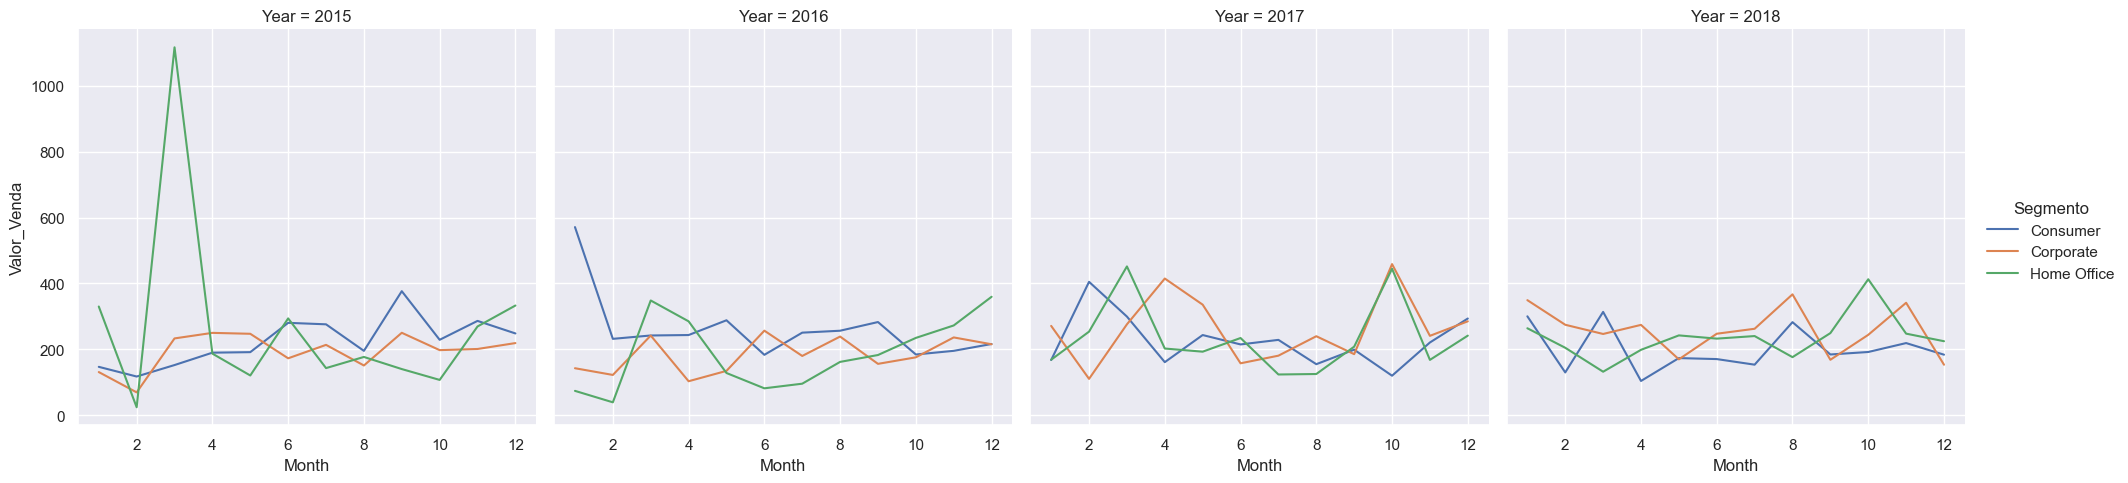

In [287]:
plt.figure(figsize = (12,6))
sns.set()

fig1 = sns.relplot(
        kind='line',
        data=grouped_df3,
        y='Valor_Venda',
        x='Month',
        hue='Segmento',
        col='Year',
        col_wrap=4)
plt.show()


# Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):
Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico

In [200]:
# Group by the year in the DateTime index and calculate the mean
grouped_df_categoria = df.groupby(['SubCategoria'])['Valor_Venda'].sum().reset_index()
grouped_df_categoria.sort_values(by='Valor_Venda', ascending=False, inplace=True)
grouped_df_categoria

,SubCategoria,Valor_Venda
13,Phones,325271.2940
5,Chairs,317919.6250
14,Storage,216188.3620
16,Tables,202083.3600
3,Binders,194723.3810
11,Machines,189238.6310
0,Accessories,162791.3620
6,Copiers,146248.0940
4,Bookcases,108045.0467
1,Appliances,104061.6930


In [210]:
top12 = []

for index, row in grouped_df_categoria.iterrows():
    top12.append(row['SubCategoria'])

top12 = top12[:12]
         

['Phones',
 'Chairs',
 'Storage',
 'Tables',
 'Binders',
 'Machines',
 'Accessories',
 'Copiers',
 'Bookcases',
 'Appliances',
 'Furnishings',
 'Paper']

In [288]:
# Filter the DataFrame based on the list of values
filtered_df = df[df['SubCategoria'].isin(top12)]
# Group the DataFrame by the 'Categoria' and 'SubCategoria' columns
grouped_df = filtered_df.groupby(['Categoria', 'SubCategoria'])['Valor_Venda'].sum().reset_index()
grouped_df_cat = filtered_df.groupby(['Categoria'])['Valor_Venda'].sum().reset_index()
grouped_df_cat

,Categoria,Valor_Venda
0,Furniture,716910.8017
1,Office Supplies,591286.2000
2,Technology,823549.3810


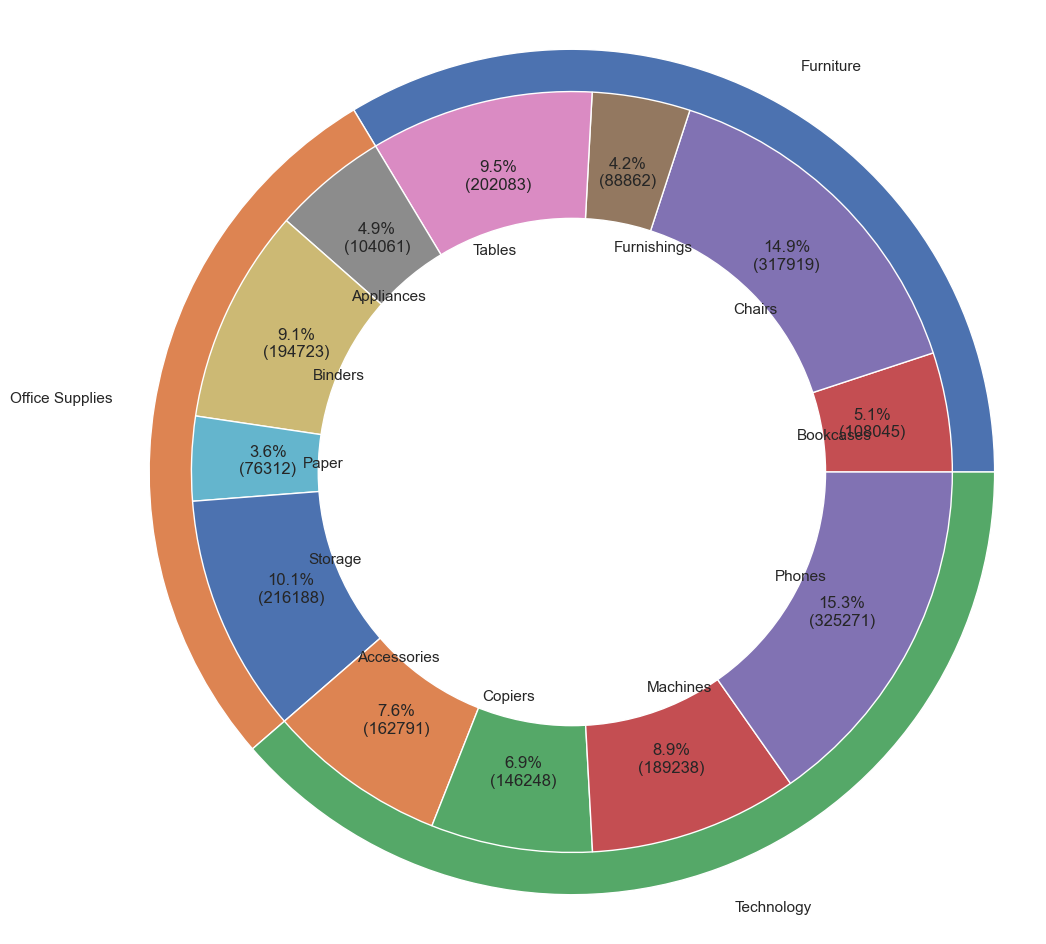

In [310]:
# Function to format autopct with percentage and value
def autopct_format(val):
    return f'{val:.1f}%\n({int(val*sum(grouped_df["Valor_Venda"])/100)})'


# Pivot the DataFrame to create separate bars for each 'Categoria' and 'SubCategoria'
fig, ax = plt.subplots(figsize = (12,12))

p1 = ax.pie(grouped_df_cat['Valor_Venda'],
           radius = 1,
            labels = grouped_df_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white')
           )

# Plot the inner pie chart for 'SubCategoria'
inner_pie = ax.pie(grouped_df['Valor_Venda'],
                   radius=0.9,
                   labels=grouped_df['SubCategoria'],
                   autopct=lambda p: autopct_format(p),
                   wedgeprops=dict(edgecolor='white'),
                   labeldistance=0.6,
                   pctdistance=0.8)

centre_circle = plt.Circle((0.0),0.6, fc = 'white')

# Create a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
ax.add_patch(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')

plt.show()